In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import json

sys.path.append('../../')
from params import *

plt.rcParams['svg.fonttype'] = 'none'

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

C:\Users\nikol\AppData\Local\Temp\ipykernel_11220\2522712595.py:12: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


In [3]:
infofile = open(infofile_name, "r")
info = json.load(infofile)
infofile.close()

print("Сетка по x: [0, ", info["END_X"], "] с шагом ", info["STEP_X"], sep="")
if not IS_LAPLACE:
    print("Сетка по t: [0, ", info["END_T"], "] с шагом ", info["STEP_T"], sep="")
print()
if IS_LAPLACE:
    print("Распределение на верхней границе задавалось функцией ", info["FUNC_GENERATOR"], sep="")
else:
    print("Начальное распределение задавалось функцией ", info["FUNC_GENERATOR"], sep="")
print()
print("Информация об эксперименте")
print(info["EXPERIMENT_INFO"])

Сетка по x: [0, 1] с шагом 0.01

Распределение на верхней границе задавалось функцией window_func_

Информация об эксперименте
Модель с VMP на основе условий на сетку через ConstrainEqualRandom. Тест на 20 слоях с dt=0.005


In [4]:
size_x = (int) (END_X / STEP_X)
size_t = (int) (END_T / STEP_T)

grid_x = np.linspace(0, END_X, size_x + 1)

In [5]:
if IS_LAPLACE != 1 and IS_LAPLACE != 2 and IS_LAPLACE != 3: 
    input_func = np.genfromtxt(input_dir + datafile_name + datafile_format, delimiter=',')

    plt.plot(grid_x, input_func)
    plt.savefig("input.svg")

0.006680076582542919


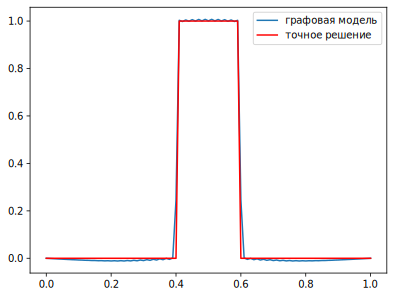

In [6]:
output_func = np.genfromtxt(output_dir + datafile_name + datafile_format, delimiter=',')
val_func = np.genfromtxt(val_dir + datafile_name + datafile_format, delimiter=',')

plt.plot(grid_x, output_func, label="графовая модель")
plt.plot(grid_x, val_func, c='r', label="точное решение")
plt.legend()
plt.savefig("prediction.svg")

norm = np.sum((output_func - val_func)**2 * STEP_X) / np.sum((val_func)**2 * STEP_X) 
print(norm)

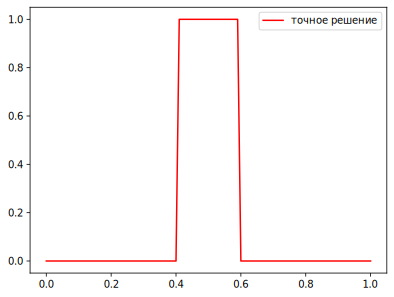

In [7]:
plt.plot(grid_x, val_func, c='r', label="точное решение")
plt.legend()
plt.savefig("func.svg")

In [8]:
if RUN_REGULARIZATION:
    output_func = np.genfromtxt(reg_dir + datafile_name + datafile_format, delimiter=',')
    val_func = np.genfromtxt(val_dir + datafile_name + datafile_format, delimiter=',')

    plt.plot(grid_x, output_func)
    plt.plot(grid_x, val_func, c='r')
    plt.savefig("prediction_reg.svg")

FileNotFoundError: reg/data.csv not found.